# Lab 3: Scale invariance, universality and criticality

In this lab we will shall see how scale invariance, universality and criticality can all emerge in relatively simple physical systems.  We will also use the problems to further develop our computational Python skills.


## Exercise 1: Maps and scale invariance
A simple dynamical system is the logistic map:
$$ x_{n+1} = rx_n(1-x_n),$$
where $x_n$ defines some quantity such as population at generation $n$.  The parameter $r$ characterises how fast the system grows from an initial value close to zero (so, for a population, we could treat it as a reproduction rate).

Despite the simplicity of this model, it displays a wide range of possible behaviours.  We will investigate this model in the parameter range $r\in[0,4)$, starting from an initial condition $x_0 = 0.2$.


### 1a)
The logistic map is a discrete time model, so it is particularly suited to simulation on a computer (where we are always forced to discretise time).  While it is easy to solve for a single run, the challenge we face is to do this at scale using Python.  Let's first set up the process for a single parameter $r$, solving by filling in a pre-allocated array of zeros with the appropriate value of $x$ at each generation number $n$.  Set $x_0 = 0.2$.  Plot your results for $r = 3.5$.


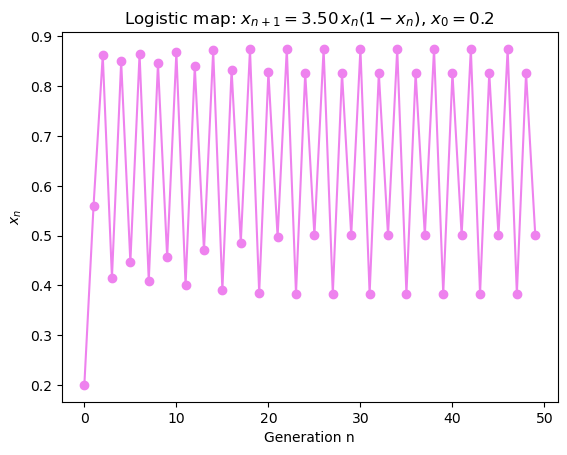

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# variables
r = 3.5
x0 = 0.2
n_i = 50

# set up array
x = np.zeros(n_i)
x[0] = x0

# logistic map
for n in range(n_i-1):
    x[n+1] = r * x[n] * (1 - x[n])

# plot
plt.plot(range(n_i), x, marker='o', linestyle='-', color='violet')
plt.xlabel("Generation n")
plt.ylabel(r"$x_n$")
plt.title(fr"Logistic map: $x_{{n+1}} = {r:.2f}\, x_n (1 - x_n)$, $x_0 = {x0}$") #f string for variable, raw string for latex
plt.show()


### 1b)
Now let's solve the problem in parallel, by simultaneously iterating the map for $r$ values in the range $r\in[0,3]$.  Consider for instance 100 $r$ values spanning this range.  Simulate the problem and plot the final map value versus $r$.  Note, this can be solved with a single for loop.  

**Hint:** If we have a 2D numpy array, `x[i]` refers to the $i$th row of the 2D array. 

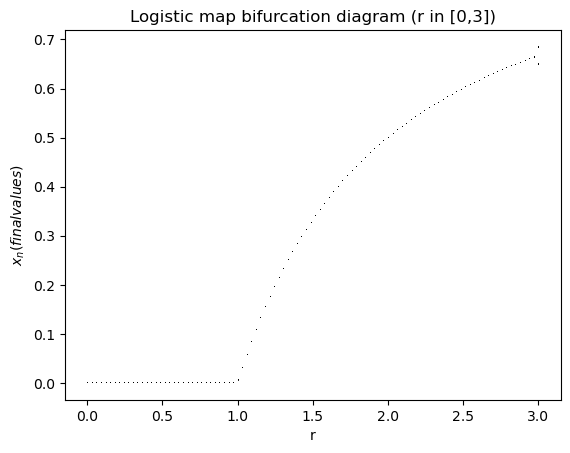

In [2]:
# parameters
r_values = np.linspace(0, 3, 100)   # 100 r values between 0 and 3
n_iter = 200                        # number of iterations
last = 50                           # only plot the last iterations to skip transients and reflect steady state behaviour

# set up array
x = np.zeros((len(r_values), n_iter))
x[:, 0] = x0

# iterate for all r in parallel
for n in range(n_iter-1):
    x[:, n+1] = r_values * x[:, n] * (1 - x[:, n])

# plot: r on x-axis, final iterations of x on y-axis
for i, r in enumerate(r_values):
    plt.plot([r]*last, x[i, -last:], ',k', alpha=0.25)  # scatter plot

plt.xlabel("r")
plt.ylabel(r"$x_n (final values)$")
plt.title("Logistic map bifurcation diagram (r in [0,3])")
plt.show()


### 1c)
We are now ready to construct a bifurcation plot of $x$ values versus $r$, for $r\in[0,4)$.  However, rather than just plotting the final $x$ value versus $r$ we would like to plot some number of points for each $r$ value.  So, for instance, if the solution jumps periodically between two points we should see these two points appearing vertically (as $y$ values) above the appropriate $r$ value (which will form our $x$ axis).  

**Hint:** This is most easily plotted using a scatter plot.  You will need to construct a 2D array of $r$ values where each column contains the same $r$ value (assuming your 2D array of $x$ data is stored in a similar way, with each column corresponding to a particular $r$ value).  You should discard some number of initial generations, to avoid plotting also 'transients'.


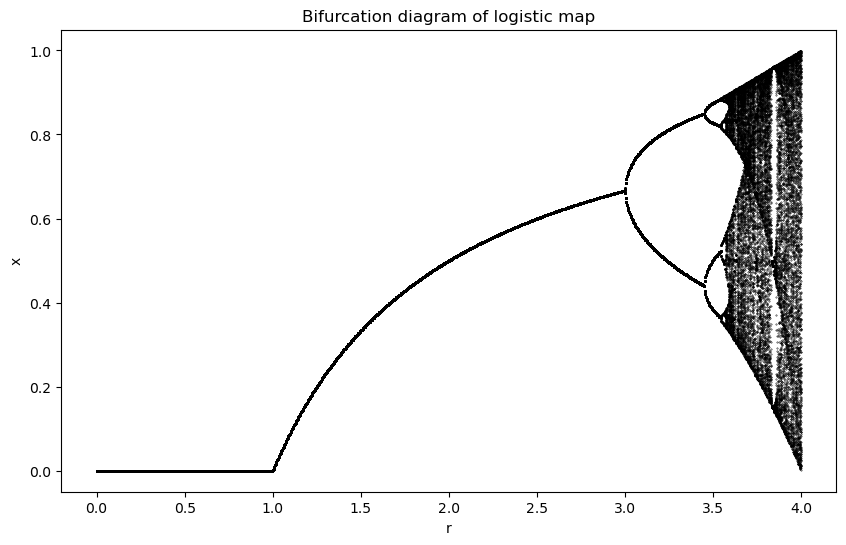

In [4]:

# parameters
r_values = np.linspace(0, 4, 1000)   # 1000 r values for detail
n_iter = 1000                        # total iterations
last = 200                           # how many final iterations to keep
x0 = 0.2

# prepare arrays
x = np.full(len(r_values), x0)       # initial condition for all r

# iterate logistic map
results_r = []
results_x = []

for i in range(n_iter):
    x = r_values * x * (1 - x)
    if i >= (n_iter - last):         # save only the final iterations
        results_r.extend(r_values)
        results_x.extend(x)

# plot
plt.figure(figsize=(10, 6))
plt.scatter(results_r, results_x, s=0.1, color="black")
plt.xlabel("r")
plt.ylabel("x")
plt.title("Bifurcation diagram of logistic map")
plt.show()


### 1d)
Construct another bifurcation plot on a zoomed in portion of the original diagram, such that you see a similar image to your full plot.  Note the scale factor in the title (relative to the original $[0,4)$ scale).  What different types of behaviour is your bifurcation plot indicating?

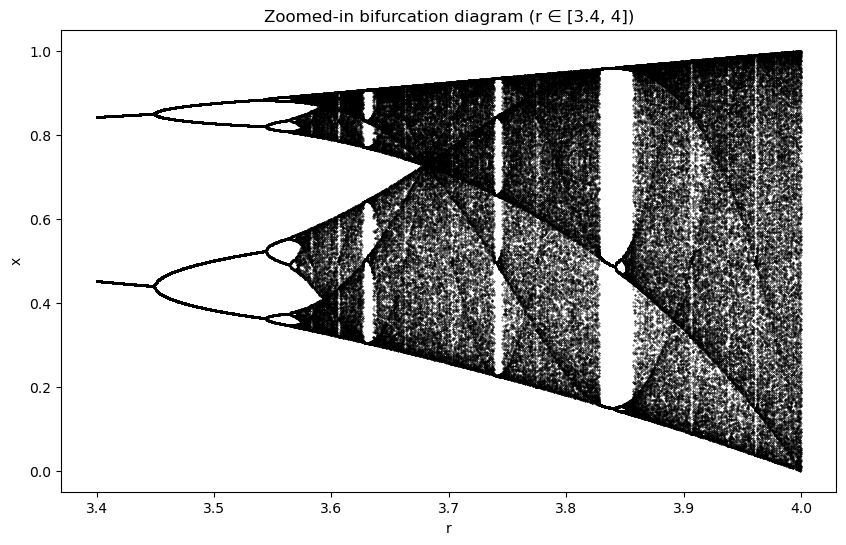

In [5]:
# zoomed-in version: r in [3.4, 4]
r_values = np.linspace(3.4, 4, 1000)
x = np.full(len(r_values), x0)

results_r = []
results_x = []

for i in range(n_iter):
    x = r_values * x * (1 - x)
    if i >= (n_iter - last):
        results_r.extend(r_values)
        results_x.extend(x)

plt.figure(figsize=(10, 6))
plt.scatter(results_r, results_x, s=0.1, color="black")
plt.xlabel("r")
plt.ylabel("x")
plt.title("Zoomed-in bifurcation diagram (r ∈ [3.4, 4])")
plt.show()


<div style="background-color:lightcyan;">
<span style="color:red"><center> <h1> Exercise 1 Submission</h1></center></span>
<p>Submit your results to 1d.</p>
</div>

## Exercise 2: Maps and universality

We are now ready to explore a fundamental concept in Physics: universality.  To do so we will continue to examine the logistic map, but we will also consider a second quite different looking map:
$$x_{n+1} = \frac{1}{\cosh(r(x_n-0.5))}$$
for the same parameter range, $r\in[0,4)$ and same initial condition $x_0 = 0.2$.

### 2a)
Plot the two functional forms of the maps (i.e. the right-hand sides) as a function of $x$ in the range $x\in[0,1]$ with $r = 3$.  Are they similar?

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


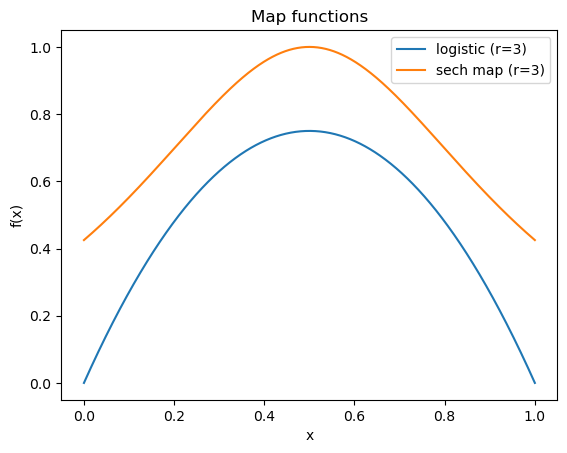

In [6]:

r = 3.0
x = np.linspace(0, 1, 1000)
f_log  = r*x*(1-x)
f_sech = 1/np.cosh(r*(x-0.5))

plt.plot(x, f_log,  label='logistic (r=3)')
plt.plot(x, f_sech, label='sech map (r=3)')
plt.xlabel('x'); plt.ylabel('f(x)'); plt.legend(); plt.title('Map functions')
plt.show()


### 2b)
Construct the bifurcation plot for the $\cosh$ map.  How is it similar/different to the bifurcation plot of the logistic map?

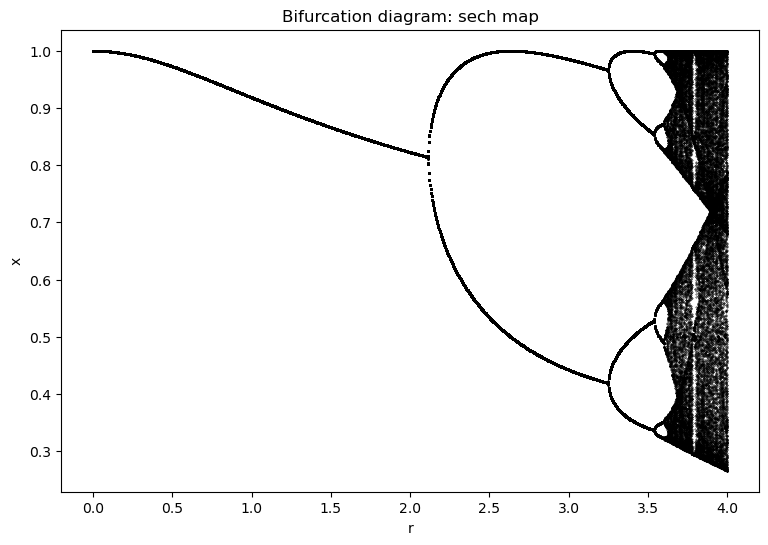

In [7]:
rvals = np.linspace(0, 4, 1200)
x0, n_iter, last = 0.2, 1200, 300
R, X = [], []
for r in rvals:
    x = x0
    for _ in range(n_iter-last):
        x = 1/np.cosh(r*(x-0.5))
    for _ in range(last):
        x = 1/np.cosh(r*(x-0.5))
        R.append(r); X.append(x)

plt.figure(figsize=(9,6))
plt.scatter(R, X, s=0.1, c='k')
plt.xlabel('r'); plt.ylabel('x'); plt.title('Bifurcation diagram: sech map')
plt.show()


### 2c) (potentially time consuming step)
One striking feature of both maps is the appearance of a 'period doubling route to chaos', in which the map period doubles at particular points, leading to longer and longer period solutions until eventually the solution is aperiodic (chaotic).  Using your simulations, identify the first five $r$ values at which the period doubles.  Do this for both your logistic map and the cosh map.  Make a note of these points, as we will use them in the next step.

In [8]:
# ----------------------------
# Maps
# ----------------------------
def logistic_map(x, r):             # f(x) = r x (1 - x)
    return r * x * (1 - x)

def sech_map(x, r):                 # f(x) = 1 / cosh(r (x - 0.5))
    return 1.0 / np.cosh(r * (x - 0.5))

# ----------------------------
# Iterate and detect period
# ----------------------------
def iterate_map(f, r, x0=0.2, burn=3000, keep=1024):
    """Iterate f for parameter r, discard 'burn' steps, return last 'keep' values."""
    x = x0
    for _ in range(burn):
        x = f(x, r)
    xs = np.empty(keep)
    for i in range(keep):
        x = f(x, r)
        xs[i] = x
    return xs

def detect_period(xs, pmax=64, tol=1e-10, repeats=3):
    """
    Smallest p <= pmax such that the last p samples repeat for 'repeats' blocks.
    i.e., xs[-p:] ≈ xs[-2p:-p] ≈ ... within tol.
    Returns p if found, else 0 (aperiodic/chaotic or period > pmax).
    """
    n = len(xs)
    for p in range(1, pmax + 1):
        ok = True
        for k in range(1, repeats + 1):
            seg1 = xs[n - k*p : n - (k-1)*p]
            seg0 = xs[n - (k+1)*p : n - k*p]
            if seg0.size < p or np.max(np.abs(seg1 - seg0)) > tol:
                ok = False
                break
        if ok:
            return p
    return 0  # not detected (likely chaotic or very long period)

# ----------------------------
# Period-doubling search
# ----------------------------
def find_period_doublings(f, r_min=0.0, r_max=4.0, target_count=5,
                          coarse_steps=4000, x0=0.2, pmax=64):
    """
    Returns a list [a1, a2, ..., a_target_count] of r-values where period doubles.
    """
    rs = np.linspace(r_min, r_max, coarse_steps)
    prev_p = None
    brackets = []

    # coarse scan to find brackets where doubling occurs
    for r in rs:
        xs = iterate_map(f, r, x0=x0)
        p = detect_period(xs, pmax=pmax)
        if p == 0:    # chaotic or undetected; treat as "no stable small period"
            continue
        if prev_p is None:
            prev_p = p
            prev_r = r
            continue
        if p == 2 * prev_p:   # detected a doubling
            brackets.append((prev_r, r, prev_p, p))
            if len(brackets) >= target_count:
                break
        if p != prev_p:       # update when period changes (not necessarily doubling)
            prev_p = p
            prev_r = r

    # refine each bracket by bisection on the period change
    results = []
    for (rl, rr, pL, pR) in brackets:
        for _ in range(40):   # ~40 iters -> ~1e-12 width worst-case
            rm = 0.5 * (rl + rr)
            pm = detect_period(iterate_map(f, rm, x0=x0), pmax=pmax)
            # We want the smallest r where the higher period holds; keep the boundary between p and 2p.
            if pm == pL:  # still lower period on the left
                rl = rm
            else:
                rr = rm
        results.append(0.5*(rl+rr))
    return results

# ----------------------------
# Run for both maps
# ----------------------------
logistic_as = find_period_doublings(logistic_map, r_min=2.5, r_max=3.7, target_count=5)
sech_as     = find_period_doublings(sech_map,     r_min=1.5, r_max=3.7, target_count=5)

print("Logistic a_n:", logistic_as)
print("sech a_n:    ", sech_as)

Logistic a_n: [2.9950570170146906, 3.4476006320974983, 3.543296891947258, 3.564076913975896, 3.568624398876235]
sech a_n:     [2.106192506330921, 3.244787540783454, 3.5371015922623363, 3.598949420957583, 3.612468319084898]


### 2d)
Let's look at how the rate to chaos scales.  For both maps calculate the following:
$$\delta = \frac{a_{n-1} - a_{n-2}}{a_{n}-a_{n-1}},$$
where $a_n$ is the value of the $n$th period doubling point.  Calculate your values for $n = 5$, $n = 4$ and $n = 3$ for your two maps.  

In [9]:
def feigenbaum_deltas(a):
    deltas = []
    for n in range(2, len(a)):
        deltas.append((a[n-1]-a[n-2])/(a[n]-a[n-1]))
    return deltas

print("Logistic deltas:", feigenbaum_deltas(logistic_as))
print("sech deltas:    ", feigenbaum_deltas(sech_as))

Logistic deltas: [4.728958224629549, 4.605204927977298, 4.569563722375068]
sech deltas:     [3.895108800593492, 4.726342988033584, 4.574916395758954]


<div style="background-color:lightcyan;">
<span style="color:red"><center> <h1> Exercise 2 Submission</h1></center></span>
<p>Submit your results to 2d, including the $a$ and $\delta$ values.</p>
</div>

## Exercise 3: Characterising phase changes

In last week's lab we saw a hint of a phase change occuring with our system of Kuramoto oscillators.  Let's return to that system to examine it in more detail.

### 3a)
Let's consider a slightly different set up to last week.  Consider a system of 1000 all-to-all oscillators with a Gaussian intrinsic frequency distribution with mean 0 and standard deviation 0.1.  Create a bifurcation diagram in this case in the range $K\in[0,0.5]$.  Remember, we should use the mean field to create the bifurcation diagram.  Is there evidence of a phase change?  Make your best guess as to where the critical point in this system is.

### 3b) 
Phase transitions are associated with 'critical exponents' which describe how the system is behaving while near the critical point.  Using your guess of the critical point, consider now $K$ values near this critical point and again construct the bifurcation picture in this $K$ range.  Can you determine anything from this?

### 3c)
Recreate your bifurcation plot on log-log axes and try to fit a straight line to your results.  What is the slope of this line?  Can you infer the critical exponent from your results?  This critical exponent is related to the universality class that this model sits in (something beyond the scope of this lab).

<div style="background-color:lightcyan;">
<span style="color:red"><center> <h1> Exercise 3 Submission</h1></center></span>
<p>Submit your results to 3c.</p>
</div>

## Exercise 4: Critical behaviour
Let's now explore the dynamics more carefully around the critical point.  As we shall see, this is complicated by the need to obtain reliable statistics (which potentially requires large simulations, either for long times or with many oscillators, or both), as well as the difficulty in extracting useful information from time series data.

### 4a) 
Create some plots of the dynamics of the order parameter for a case that is near the critical point, and cases further from the critical point, on either side of the transition.  Look at the time series and note any qualitative differences in the behaviour.

### 4b)
One possible way to extract information from the time series is to look at the frequencies of the excitations appearing in the behaviour of the order parameter.  Examine the frequencies of the dynamics for different values of the coupling (near the critical point and away from critical point).  There are many ways to obtain frequency information, for instance the numpy function `np.fft.fft`.


### 4c) 
Create spectral density plots for dynamics near the critical point and away from the critical point and comment on your results.


<div style="background-color:lightcyan;">
<span style="color:red"><center> <h1> Exercise 4 Submission</h1></center></span>
<p>Submit your results to 4c.</p>
</div>

## Exercise 5 (Optional)

Another possible signal that can be examined is the 'avalanche size'.  An avalanche is defined as the number of oscillators that change to running with the same frequency as the globally synchronised state in a particular time segment.  We see that this poses a number of technical problems.  We need to define an instantaneous oscillator frequency as well as an instantaneous global oscillator frequency (i.e. look at the order parameter).  In both cases we need to use the phase to find a frequency (the numpy function `np.diff` may be helpful for this).  After this we need to check which oscillators have 'changed status' (i.e. moved from being at the same frequency to not or vice versa), so we need a way to count these changes (again, `np.diff` can help here).  Along the way we need to decide which points in time we are comparing.  So, we need high time resolution to calculate frequency, but we probably want to compare states at a different time period.  

So, we need to calculate instantaneous frequencies, then look at coarser time steps and compare the number of oscillators in-sync with the global oscillator behaviour, and determine the change in this number.  This will result in a distribution of avalanche sizes.  What does this look like?

<div style="background-color:lightcyan;">
<span style="color:red"><center> <h1> Exercise 5 Submission</h1></center></span>
<p>Submit your results on avalanching, along with any comments on your results. </p>
</div>